# Exercise 2 -  Make Another Visualization

plot_weather_data is passed a dataframe called turnstile_weather. 
Use turnstile_weather along with ggplot to make another data visualization
focused on the MTA and weather data we used in Project 3.

Make a type of visualization different than what you did in the previous exercise.
Try to use the data in a different way (e.g., if you made a lineplot concerning 
ridership and time of day in exercise #1, maybe look at weather and try to make a 
histogram in this exercise). Or try to use multiple encodings in your graph if 
you didn't in the previous exercise.

You should feel free to implement something that we discussed in class 
(e.g., scatterplots, line plots, or histograms) or attempt to implement
something more advanced if you'd like.

Here are some suggestions for things to investigate and illustrate:
 * Ridership by time-of-day or day-of-week
 * How ridership varies by subway station (UNIT)
 * Which stations have more exits or entries at different times of day
   (You can use UNIT as a proxy for subway station.)

If you'd like to learn more about ggplot and its capabilities, take
a look at the documentation at:
https://pypi.python.org/pypi/ggplot/

You can check out the link 
https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
to see all the columns and data points included in the turnstile_weather 
dataframe.

However, due to the limitation of our Amazon EC2 server, we are giving you a random
subset, about 1/3 of the actual data in the turnstile_weather dataframe.


In [5]:
%pylab inline
from pandas import *
import dateutil.parser as parser
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


#### Functions created to convert the string received in date


In [6]:
def getYear(date):
    return parser.parse(date).year

def getMonth(date):
    return parser.parse(date).month

def getDay(date):
    return parser.parse(date).day

def getHour(time):
    return time.split(':')[0]

def getMinute(time):
    return time.split(':')[1]

#### Function that will show informations

In [62]:
def plot_weather_data(turnstile_weather):

    # Algorithm that will create new date columns 
    turnstile_weather["Day"] = turnstile_weather["DATEn"].apply(getDay)
    turnstile_weather["Month"] = turnstile_weather["DATEn"].apply(getMonth)
    turnstile_weather["Year"] = turnstile_weather["DATEn"].apply(getYear)
    
    ds = turnstile_weather[turnstile_weather['Year'] == 2011][['UNIT', 'ENTRIESn_hourly']]\
    .groupby(['UNIT'])\
    .sum()\
    .sort_values(['ENTRIESn_hourly'], ascending=[False])[0:5]
    
    plt.pie(ds)
    plt.show()
    
    print (ds)

In [56]:
dataset = pandas.read_csv("turnstile_data_master_with_weather.csv")
dataset.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


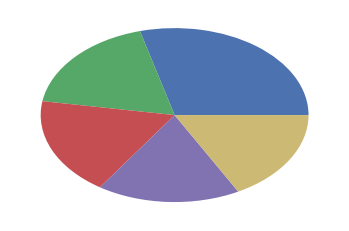

      ENTRIESn_hourly
UNIT                 
R170        2887918.0
R084        1809423.0
R022        1796932.0
R033        1711663.0
R046        1695150.0


In [63]:
plot_weather_data(dataset)